In [1]:
import pandas as pd

# Load the uploaded Excel file to check its structure
file_path = '../dataset/rab107row.xlsx'
data = pd.read_excel(file_path)

In [2]:
data.shape

(107, 12)

In [3]:
data.head()

,namaproyek,rab,waktu,provinsi,tahun,luas,subitem,tinggi,lantai,ikk,ihbp,inflasi
0,Gedung Apartemen,2.641914e+10,196,Jawa Barat,2019,17401.00,4,21.8,6,103.03,143.72,3.21
1,Gedung Apartemen,8.821079e+10,273,DKI Jakarta,2022,16320.59,6,47.6,14,121.48,107.66,4.21
2,Gedung Apartemen,8.171200e+10,348,DKI Jakarta,2023,23688.00,5,34.0,10,116.73,113.88,2.28
3,Gedung Apartemen,3.690000e+11,830,Banten,2021,55000.00,6,49.8,16,97.64,109.64,1.91
4,Gedung Apartemen,5.400316e+11,700,DKI Jakarta,2023,150000.00,6,105.0,30,116.73,113.88,2.28


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import BayesianRidge, Lasso, LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [5]:
# Label encoding kolom 'Provinsi' dan nama proyek karena nilainya kategorikal
label_encoder = LabelEncoder()
data['label_provinsi'] = label_encoder.fit_transform(data['provinsi'])
data['label_namaproyek'] = label_encoder.fit_transform(data['namaproyek'])

# Melihat nilai unik dari hasil encoding kolom 'provinsi_encoded'
provinsi_unik = data[['provinsi', 'label_provinsi']].drop_duplicates().sort_values(
    by='label_provinsi')

# Melihat nilai unik dari hasil encoding kolom 'namaproyek_encoded'
namaproyek_unik = data[['namaproyek', 'label_namaproyek']].drop_duplicates().sort_values(
    by='label_namaproyek')

In [6]:
provinsi_unik

,provinsi,label_provinsi
95,Bali,0
3,Banten,1
1,DKI Jakarta,2
0,Jawa Barat,3
23,Jawa Tengah,4
59,Jawa Timur,5
66,Kalimantan Timur,6
55,Kepulauan Riau,7
90,Lampung,8
25,Nusa Tenggara Barat,9


In [7]:
namaproyek_unik

,namaproyek,label_namaproyek
0,Gedung Apartemen,0
35,Gedung Asrama,1
43,Gedung Gudang,2
45,Gedung Hotel,3
49,Gedung Kampus,4
55,Gedung Kantor,5
76,Gedung Laboratorium,6
80,Gedung Olahraga,7
83,Gedung Pabrik,8
84,Gedung Parkir,9


In [8]:
data['rab'] = data['rab'].apply(lambda x: np.log1p(x))

In [9]:
data.head()

,namaproyek,rab,waktu,provinsi,tahun,luas,subitem,tinggi,lantai,ikk,ihbp,inflasi,label_provinsi,label_namaproyek
0,Gedung Apartemen,23.997354,196,Jawa Barat,2019,17401.00,4,21.8,6,103.03,143.72,3.21,3,0
1,Gedung Apartemen,25.202995,273,DKI Jakarta,2022,16320.59,6,47.6,14,121.48,107.66,4.21,2,0
2,Gedung Apartemen,25.126467,348,DKI Jakarta,2023,23688.00,5,34.0,10,116.73,113.88,2.28,2,0
3,Gedung Apartemen,26.634062,830,Banten,2021,55000.00,6,49.8,16,97.64,109.64,1.91,1,0
4,Gedung Apartemen,27.014893,700,DKI Jakarta,2023,150000.00,6,105.0,30,116.73,113.88,2.28,2,0


In [10]:
# 4. Normalisasi Kolom Numerik
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

numerical_columns = ['waktu', 'tahun', 'luas', 'subitem', 
                     'tinggi', 'lantai', 'ikk', 'ihbp', 'inflasi']
# 4. Normalisasi Kolom Numerik
scalerMinMax = MinMaxScaler()
data[numerical_columns] = scalerMinMax.fit_transform(data[numerical_columns])

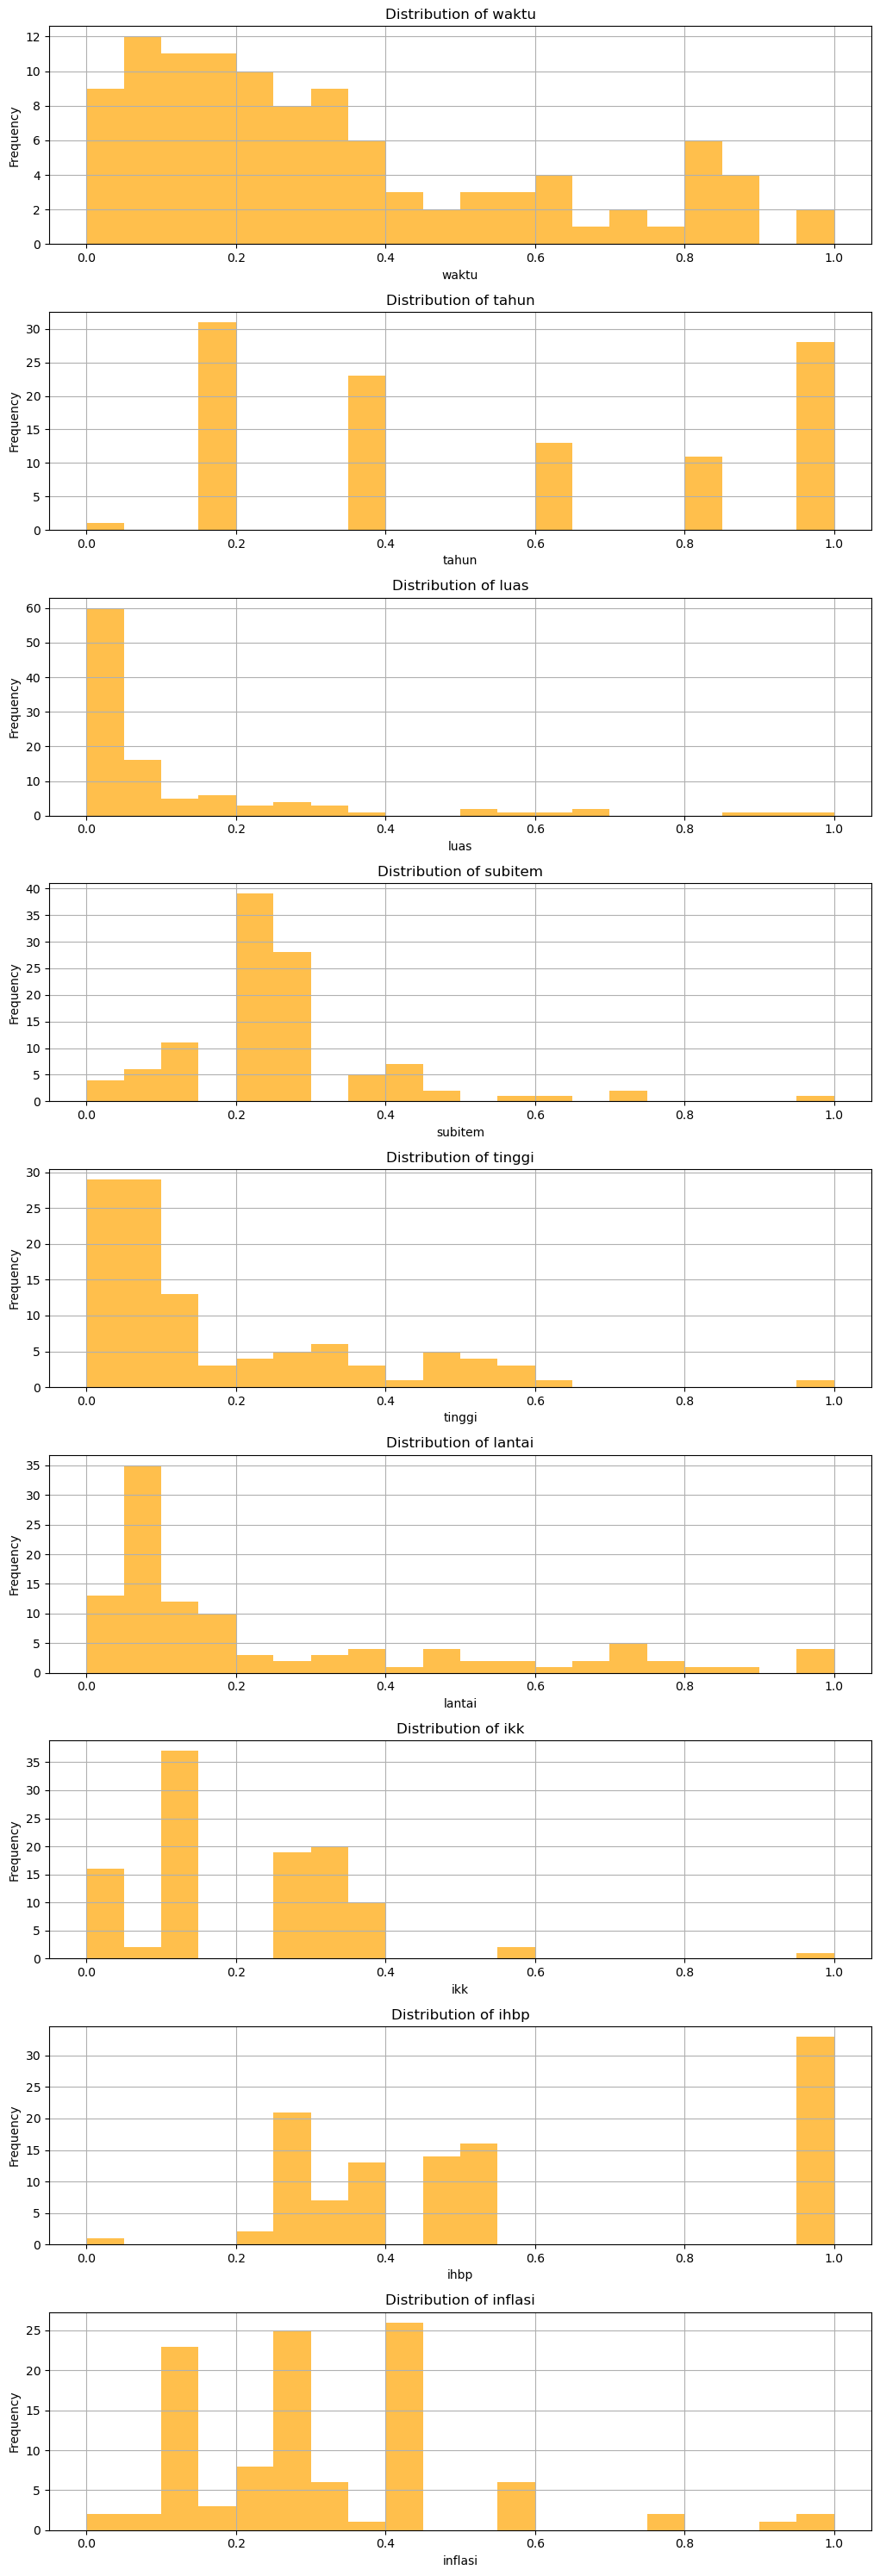

In [11]:
# Compare distributions before and after transformation using histograms
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 30))
for i, col in enumerate(numerical_columns, 1):

    # Transformed data
    plt.subplot(len(numerical_columns), 2, 2 * i)
    data[col].hist(bins=20, alpha=0.7, color='orange')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

MinMax Scaler dulu

In [12]:
cekduplikat = data[data.duplicated()]
cekduplikat

,namaproyek,rab,waktu,provinsi,tahun,luas,subitem,tinggi,lantai,ikk,ihbp,inflasi,label_provinsi,label_namaproyek
22,Gedung Apartemen,26.146404,0.822751,Banten,0.4,0.154766,0.214286,0.475682,0.75,0.017075,0.264106,0.10424,1,0


In [13]:
transformed_data = data.drop_duplicates()

cekduplikat = transformed_data[transformed_data.duplicated()]
cekduplikat, transformed_data.shape

(Empty DataFrame
 Columns: [namaproyek, rab, waktu, provinsi, tahun, luas, subitem, tinggi, lantai, ikk, ihbp, inflasi, label_provinsi, label_namaproyek]
 Index: [],
 (106, 14))

In [14]:
# Fungsi untuk mendeteksi outlier menggunakan metode IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analisis outlier untuk setiap kolom numerik
outlier_results = {}
for col in numerical_columns:
    outliers, lower, upper = detect_outliers_iqr(transformed_data, col)
    outlier_results[col] = {
        "outliers_count": len(outliers),
        "lower_bound": lower,
        "upper_bound": upper
    }

# Menampilkan hasil analisis outlier
outlier_results

{'waktu': {'outliers_count': 2,
  'lower_bound': -0.36292989417989413,
  'upper_bound': 0.9320436507936507},
 'tahun': {'outliers_count': 0,
  'lower_bound': -1.0000000000000284,
  'upper_bound': 2.200000000000017},
 'luas': {'outliers_count': 15,
  'lower_bound': -0.1512983234534677,
  'upper_bound': 0.2743226533803688},
 'subitem': {'outliers_count': 24,
  'lower_bound': 0.10714285714285707,
  'upper_bound': 0.3928571428571429},
 'tinggi': {'outliers_count': 4,
  'lower_bound': -0.2710795454545454,
  'upper_bound': 0.568465909090909},
 'lantai': {'outliers_count': 5,
  'lower_bound': -0.42187499999999994,
  'upper_bound': 0.8531249999999999},
 'ikk': {'outliers_count': 1,
  'lower_bound': -0.19556333917104485,
  'upper_bound': 0.6042031523642734},
 'ihbp': {'outliers_count': 0,
  'lower_bound': -0.6568645469582796,
  'upper_bound': 1.9941187281749673},
 'inflasi': {'outliers_count': 5,
  'lower_bound': -0.1643109540636042,
  'upper_bound': 0.7685512367491166}}

In [15]:
# Fungsi untuk mendeteksi dan menghapus baris yang mengandung outlier
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Hapus baris yang memiliki nilai outlier
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Hapus outlier untuk setiap kolom numerik
data_cleaned = transformed_data.copy()
for col in numerical_columns:
    data_cleaned = remove_outliers_iqr(data_cleaned, col)

In [16]:
data_cleaned.shape

(50, 14)

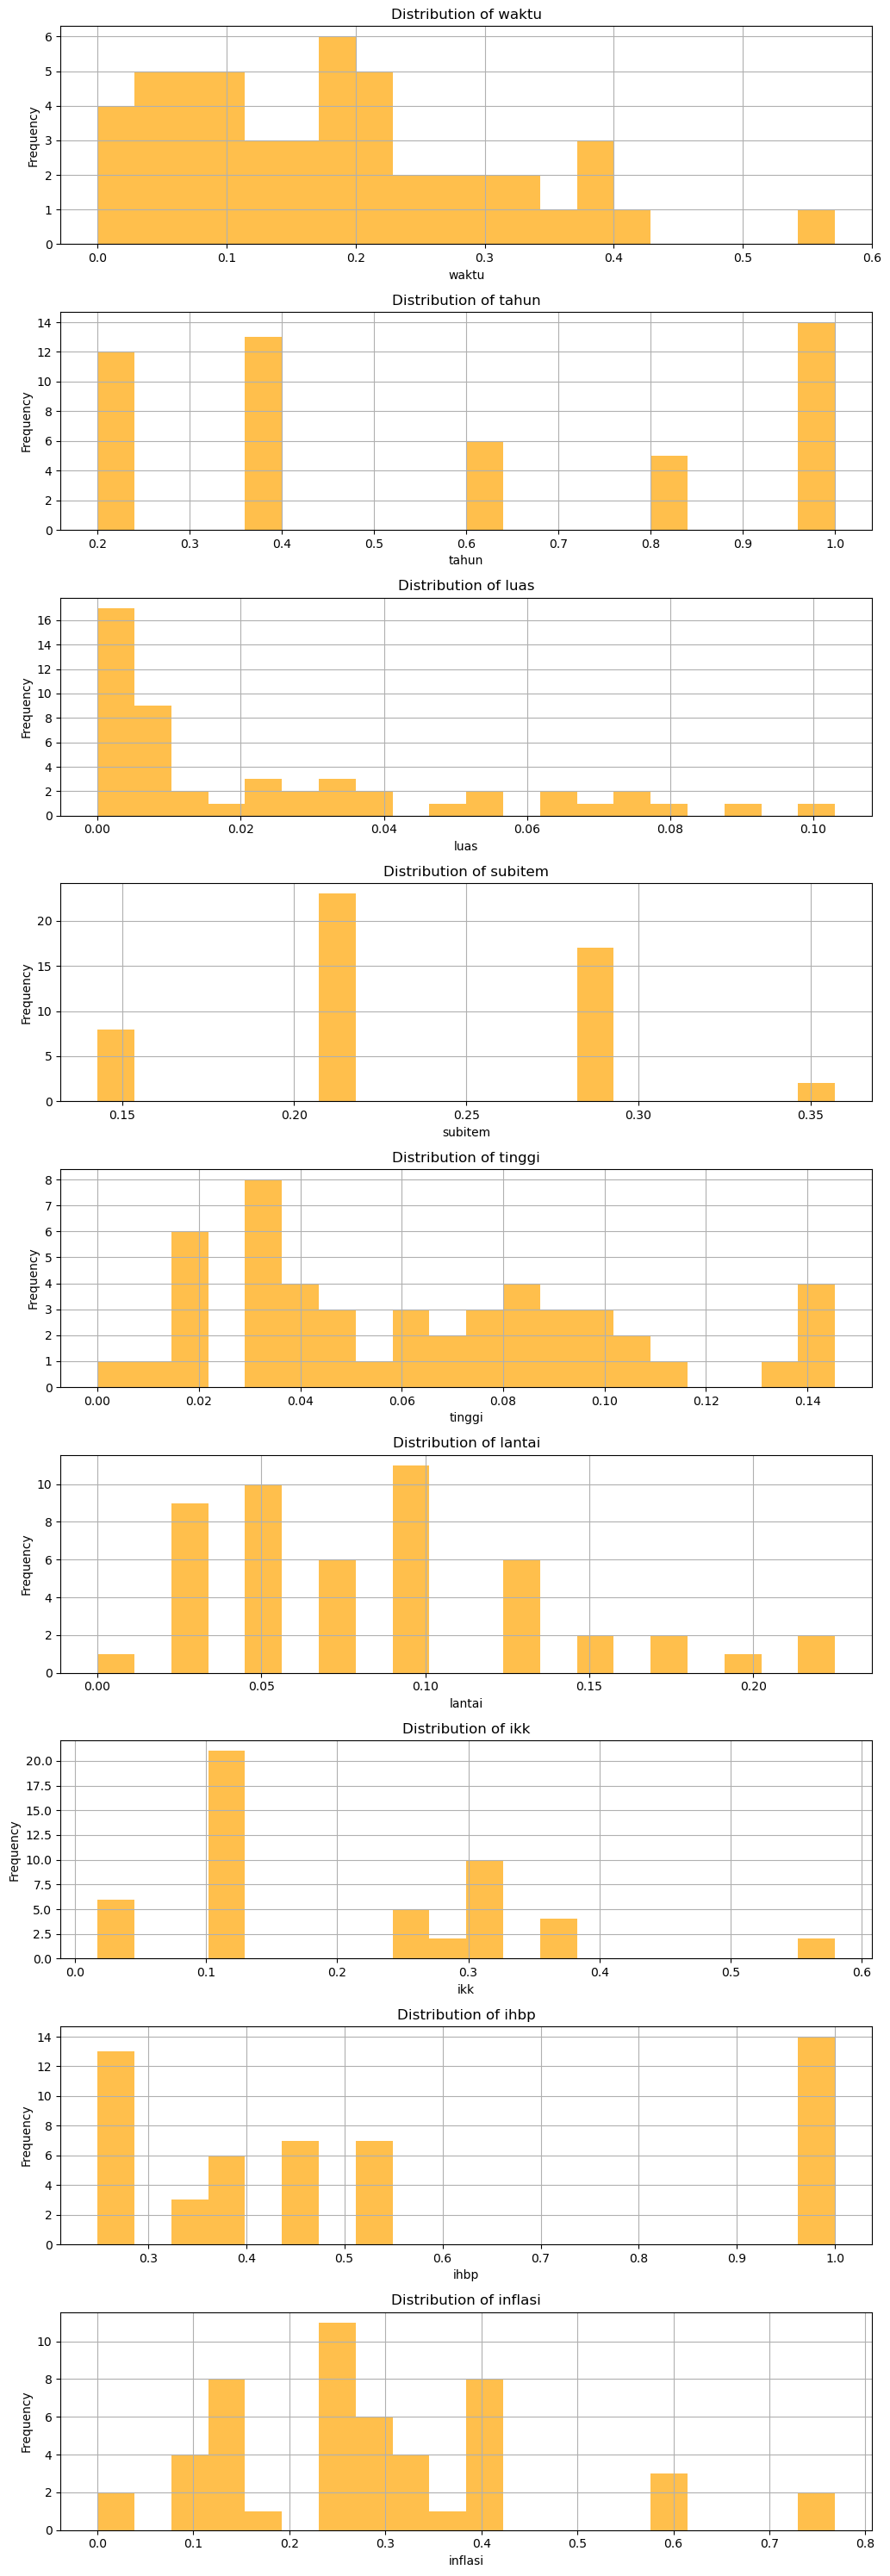

In [17]:
plt.figure(figsize=(20, 30))
for i, col in enumerate(numerical_columns, 1):

    # Transformed data
    plt.subplot(len(numerical_columns), 2, 2 * i)
    data_cleaned[col].hist(bins=20, alpha=0.7, color='orange')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [18]:
data_cleaned.head()

,namaproyek,rab,waktu,provinsi,tahun,luas,subitem,tinggi,lantai,ikk,ihbp,inflasi,label_provinsi,label_namaproyek
0,Gedung Apartemen,23.997354,0.116402,Jawa Barat,0.2,0.074449,0.142857,0.080909,0.125,0.104349,1.000000,0.415194,3,0
2,Gedung Apartemen,25.126467,0.317460,DKI Jakarta,1.0,0.103029,0.214286,0.136364,0.225,0.304291,0.451571,0.250883,2,0
5,Gedung Apartemen,24.660967,0.371693,Jawa Barat,1.0,0.034850,0.285714,0.092955,0.175,0.119673,0.523617,0.286219,3,0
6,Gedung Apartemen,23.608067,0.103175,DKI Jakarta,0.6,0.019077,0.285714,0.091818,0.100,0.372738,0.373645,0.118375,2,0
10,Gedung Apartemen,25.517246,0.358466,Jawa Barat,0.2,0.052859,0.285714,0.140909,0.225,0.104349,1.000000,0.415194,3,0


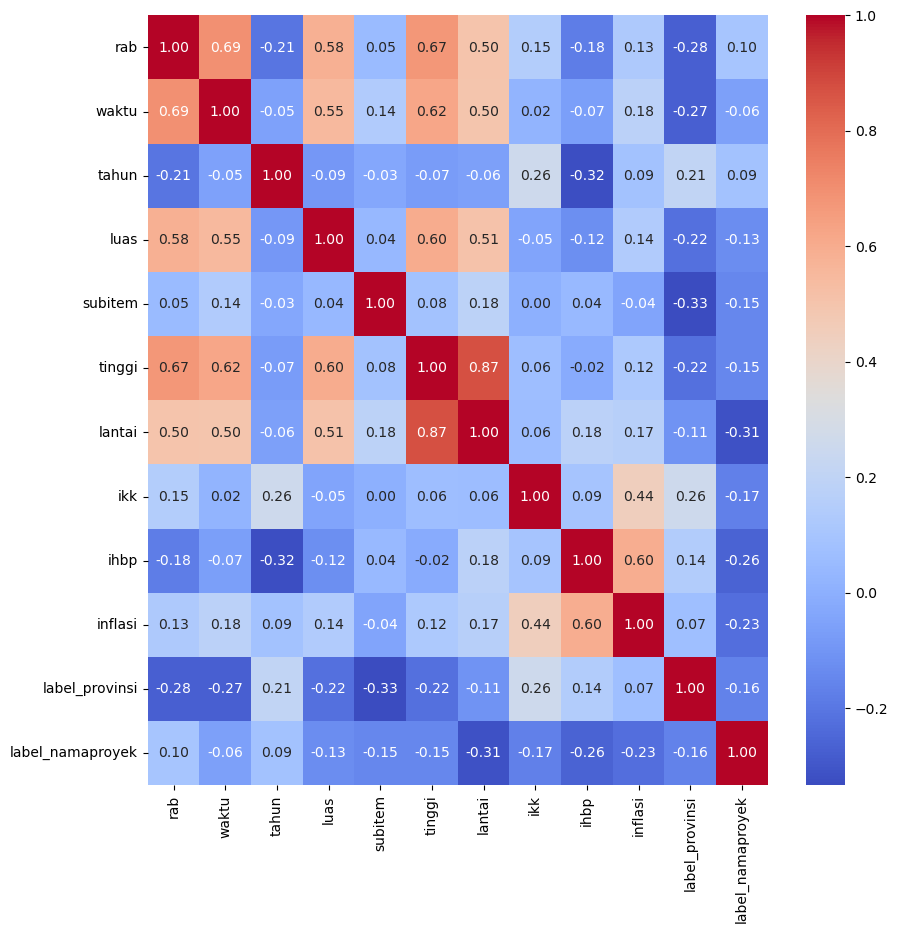

In [19]:
# Digunakan untuk membuat visualisasi dalam bentuk grafik atau plot
import seaborn as sns
import matplotlib.pyplot as plt
# Visualisasi korelasi antar fitur atau kolom apakah saling berpengaruh atau tidak
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(data_cleaned.corr(numeric_only=True), 
            annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
plt.show()

In [20]:
# Split data into features and target
X1 = data_cleaned.drop(columns=[
    'rab', 'namaproyek', 'provinsi', 'lantai'])
y1 = data_cleaned['rab']

# Split into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1, y1, 
    test_size=0.3, 
    random_state=42)

# Split into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X1, y1, 
    test_size=0.2, 
    random_state=42)

In [21]:
# Initialize models
models1 = {
    'AdaBoost': AdaBoostRegressor(),
    'Bayesian Ridge': BayesianRidge(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'KNN Regressor': KNeighborsRegressor(),
    'Lasso Regression': Lasso(),
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Ridge Regression': Ridge(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor()
}

models2 = {
    'AdaBoost': AdaBoostRegressor(),
    'Bayesian Ridge': BayesianRidge(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'KNN Regressor': KNeighborsRegressor(),
    'Lasso Regression': Lasso(),
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Ridge Regression': Ridge(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor()
}

# 70:30
# Train and evaluate each model with additional metrics
results1 = []
for name1, model1 in models1.items():
    # Fit model to training data
    model1.fit(X_train1, y_train1)
    
    # Predict on training data
    y_train_pred1 = model1.predict(X_train1)
    
    # Predict on testing data
    y_pred1 = model1.predict(X_test1)
    
    # Calculate metrics for training data
    r2_train1 = r2_score(y_train1, y_train_pred1)
    
    # Calculate metrics for testing data
    mse1 = mean_squared_error(y_test1, y_pred1)
    mae1 = mean_absolute_error(y_test1, y_pred1)
    r21 = r2_score(y_test1, y_pred1)
    
    # Append results
    results1.append({
        'Model': name1,
        'Training R2 Score': r2_train1,
        'Testing RMSE': np.sqrt(mse1),
        'Testing MAE': mae1,
        'Testing R2 Score': r21
    })

# Convert results into a DataFrame for better visualization
results_df1 = pd.DataFrame(results1).sort_values(by='Testing R2 Score', ascending=False)

# 80:20
# Train and evaluate each model with additional metrics
results2 = []
for name2, model2 in models2.items():
    # Fit model to training data
    model2.fit(X_train2, y_train2)
    
    # Predict on training data
    y_train_pred2 = model2.predict(X_train2)
    
    # Predict on testing data
    y_pred2 = model2.predict(X_test2)
    
    # Calculate metrics for training data
    r2_train2 = r2_score(y_train2, y_train_pred2)
    
    # Calculate metrics for testing data
    mse2 = mean_squared_error(y_test2, y_pred2)
    mae2 = mean_absolute_error(y_test2, y_pred2)
    r22 = r2_score(y_test2, y_pred2)
    
    # Append results
    results2.append({
        'Model': name2,
        'Training R2 Score': r2_train2,
        'Testing RMSE': np.sqrt(mse2),
        'Testing MAE': mae2,
        'Testing R2 Score': r22
    })

# Convert results into a DataFrame for better visualization
results_df2 = pd.DataFrame(results2).sort_values(by='Testing R2 Score', ascending=False)


In [22]:
results_df1

,Model,Training R2 Score,Testing RMSE,Testing MAE,Testing R2 Score
0,AdaBoost,0.967497,0.801153,0.647389,0.623026
7,Random Forest,0.929742,0.810121,0.650978,0.614539
6,Linear Regression,0.804724,0.955474,0.792886,0.463811
1,Bayesian Ridge,0.764621,0.965027,0.816535,0.453036
10,XGBoost,1.000000,1.119756,0.852746,0.263578
3,Gradient Boosting,0.999882,1.137200,0.846712,0.240455
8,Ridge Regression,0.538197,1.148014,0.904396,0.225940
2,Decision Tree,1.000000,1.225384,0.940228,0.118089
5,Lasso Regression,0.033187,1.332927,1.015968,-0.043501
4,KNN Regressor,0.360325,1.446465,0.979111,-0.228842


In [23]:
results_df2

,Model,Training R2 Score,Testing RMSE,Testing MAE,Testing R2 Score
0,AdaBoost,0.953757,0.855593,0.696903,0.632198
7,Random Forest,0.933108,0.996635,0.736577,0.500941
6,Linear Regression,0.800146,0.997374,0.824870,0.500201
1,Bayesian Ridge,0.764964,1.006474,0.815759,0.491039
3,Gradient Boosting,0.999673,1.104449,0.858297,0.387126
8,Ridge Regression,0.545288,1.258724,0.929227,0.203950
5,Lasso Regression,0.000000,1.419697,1.060990,-0.012676
10,XGBoost,1.000000,1.449830,1.037677,-0.056120
9,SVR,0.275613,1.596420,1.060479,-0.280484
4,KNN Regressor,0.441212,1.617146,1.084138,-0.313947


In [24]:
# Ambil model terbaik dari split data 70:30
best_model_name1 = results_df1.iloc[0]['Model']
best_model1 = models1[best_model_name1]

# Ambil model terbaik dari split data 80:20
best_model_name2 = results_df2.iloc[0]['Model']
best_model2 = models2[best_model_name2]


In [25]:
# Prediksi nilai actual dan prediksi untuk 70:30
y_actual1 = y_test1
y_pred_best1 = best_model1.predict(X_test1)

# Prediksi nilai actual dan prediksi untuk 80:20
y_actual2 = y_test2
y_pred_best2 = best_model2.predict(X_test2)


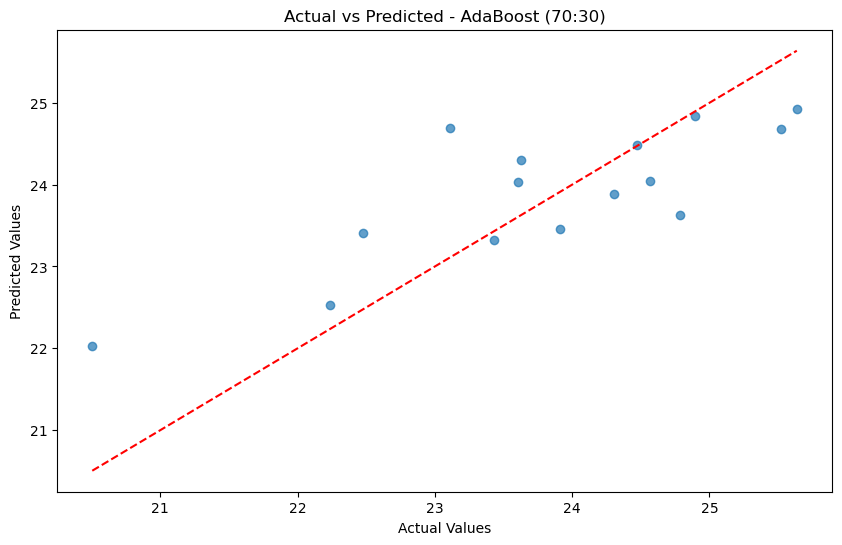

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_actual1, y_pred_best1, alpha=0.7)
plt.plot([y_actual1.min(), y_actual1.max()], [y_actual1.min(), y_actual1.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs Predicted - {best_model_name1} (70:30)")
plt.show()


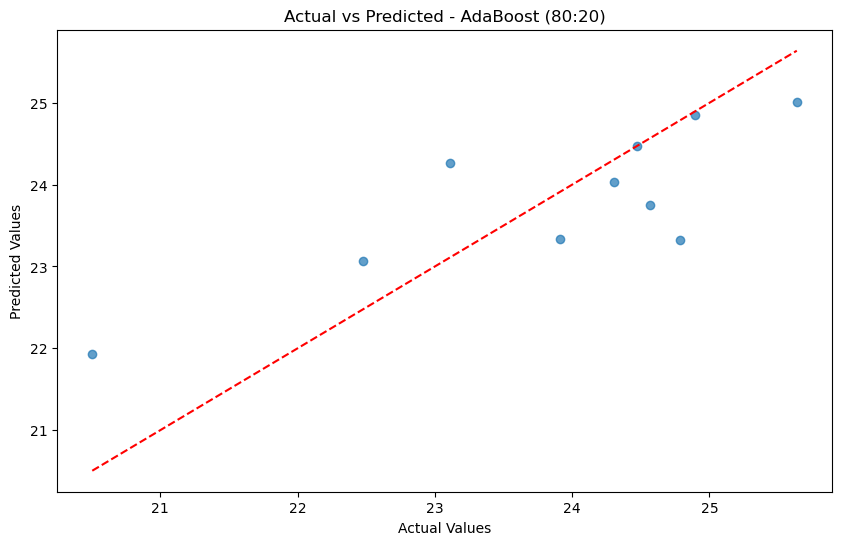

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_actual2, y_pred_best2, alpha=0.7)
plt.plot([y_actual2.min(), y_actual2.max()], [y_actual2.min(), y_actual2.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs Predicted - {best_model_name2} (80:20)")
plt.show()


In [28]:
# Dataframe untuk 70:30
comparison1 = pd.DataFrame({'Actual': y_actual1, 'Predicted': y_pred_best1})

# Dataframe untuk 80:20
comparison2 = pd.DataFrame({'Actual': y_actual2, 'Predicted': y_pred_best2})

# Tampilkan beberapa baris pertama
print(comparison1.head())
print(comparison2.head())


       Actual  Predicted
41  23.914647  23.455608
88  24.304149  23.882101
73  24.569757  24.039250
98  22.478156  23.406537
54  25.635921  24.926849
       Actual  Predicted
41  23.914647  23.336794
88  24.304149  24.033798
73  24.569757  23.752915
98  22.478156  23.060759
54  25.635921  25.005455


In [33]:
# Kembalikan nilai log ke bentuk asli
comparison1['Actual (Original)'] = np.exp(comparison1['Actual'])
comparison1['Predicted (Original)'] = np.exp(comparison1['Predicted'])

comparison2['Actual (Original)'] = np.exp(comparison2['Actual'])
comparison2['Predicted (Original)'] = np.exp(comparison2['Predicted'])

# Format ke dalam Rupiah
def format_rupiah(value):
    return f"Rp {value:,.0f}".replace(",", ".")

comparison1['Actual (Rupiah)'] = comparison1['Actual (Original)'].apply(format_rupiah)
comparison1['Predicted (Rupiah)'] = comparison1['Predicted (Original)'].apply(format_rupiah)

comparison2['Actual (Rupiah)'] = comparison2['Actual (Original)'].apply(format_rupiah)
comparison2['Predicted (Rupiah)'] = comparison2['Predicted (Original)'].apply(format_rupiah)

# Tampilkan beberapa baris pertama
print(comparison1[['Actual (Rupiah)', 'Predicted (Rupiah)']])
print()
print("*" * 100)
print(comparison2[['Actual (Rupiah)', 'Predicted (Rupiah)']])


        Actual (Rupiah) Predicted (Rupiah)
41    Rp 24.322.000.001  Rp 15.368.842.169
88    Rp 35.905.245.001  Rp 23.543.148.260
73    Rp 46.828.450.001  Rp 27.549.491.987
98     Rp 5.782.814.828  Rp 14.632.877.544
54   Rp 136.000.000.001  Rp 66.925.711.124
105   Rp 58.108.499.108  Rp 18.324.286.948
65    Rp 10.846.226.019  Rp 52.642.467.703
64    Rp 65.000.000.001  Rp 61.429.945.571
77       Rp 803.388.209   Rp 3.701.552.782
56    Rp 42.500.000.001  Rp 43.135.876.010
40    Rp 18.238.433.211  Rp 35.755.484.567
10   Rp 120.781.089.488  Rp 52.218.884.638
84    Rp 15.027.747.346  Rp 13.482.100.212
35     Rp 4.545.551.009   Rp 6.059.804.569
6     Rp 17.900.000.001  Rp 27.276.088.692

****************************************************************************************************
        Actual (Rupiah) Predicted (Rupiah)
41    Rp 24.322.000.001  Rp 13.647.108.781
88    Rp 35.905.245.001  Rp 27.399.706.114
73    Rp 46.828.450.001  Rp 20.689.982.078
98     Rp 5.782.814.828  Rp 10.355.241

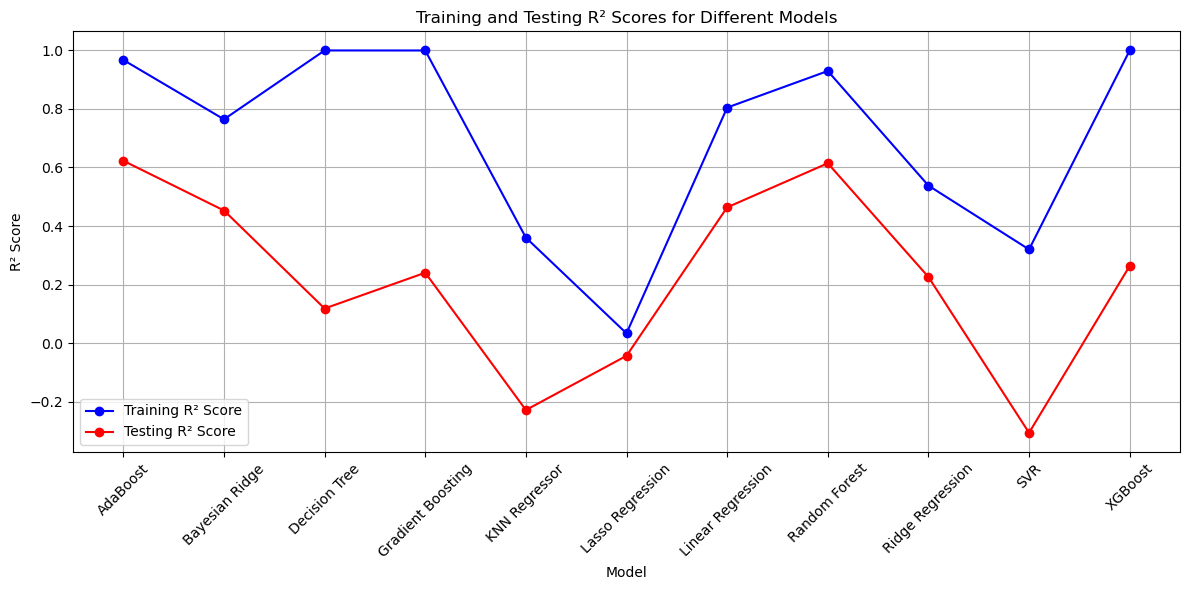

In [35]:
import matplotlib.pyplot as plt

# Extract model names and their corresponding R² scores
model_names = [r['Model'] for r in results1]
train_r2_scores = [r['Training R2 Score'] for r in results1]
test_r2_scores = [r['Testing R2 Score'] for r in results1]


# Set the figure size
plt.figure(figsize=(12, 6))

# Plot Training R² Scores
plt.plot(model_names, train_r2_scores, 'bo-', label='Training R² Score')

# Plot Testing R² Scores
plt.plot(model_names, test_r2_scores, 'ro-', label='Testing R² Score')

# Customize the plot
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('Training and Testing R² Scores for Different Models')
plt.xticks(rotation=45)  # Rotate model names for better visibility
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


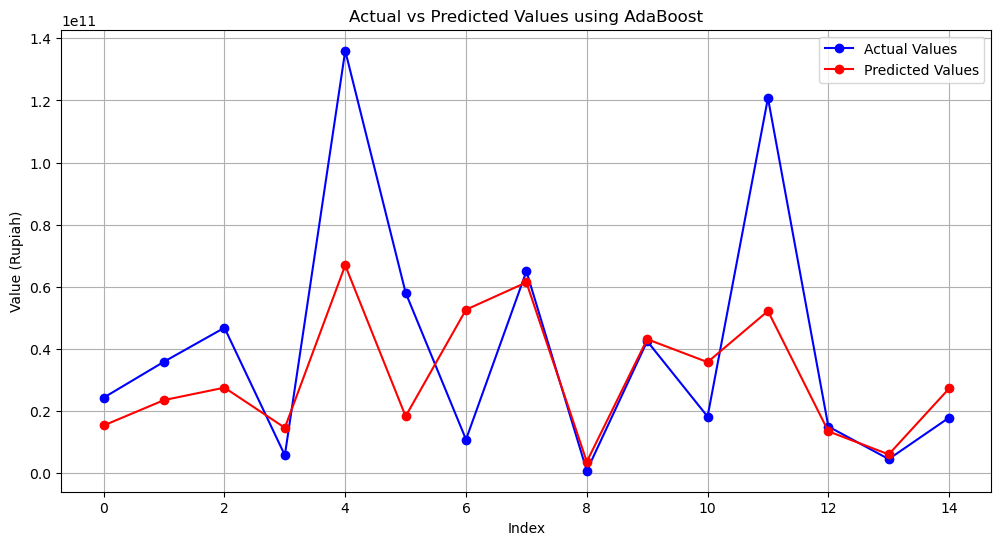

In [38]:
# Identify the best model based on Testing R² Score
best_model_name = results_df1.iloc[0]['Model']
best_model = models1[best_model_name]

# Predict on the test data
y_pred_log = best_model.predict(X_test1)

# If your target variable was log-transformed, revert it back
y_actual = np.exp(y_test1.reset_index(drop=True))
y_pred = np.exp(y_pred_log)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual': y_actual,
    'Predicted': y_pred
})

# Plot Actual vs Predicted Values
plt.figure(figsize=(12, 6))
plt.plot(comparison_df.index, comparison_df['Actual'], 'bo-', label='Actual Values')
plt.plot(comparison_df.index, comparison_df['Predicted'], 'ro-', label='Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value (Rupiah)')
plt.title(f'Actual vs Predicted Values using {best_model_name}')
plt.legend()
plt.grid(True)
plt.show()


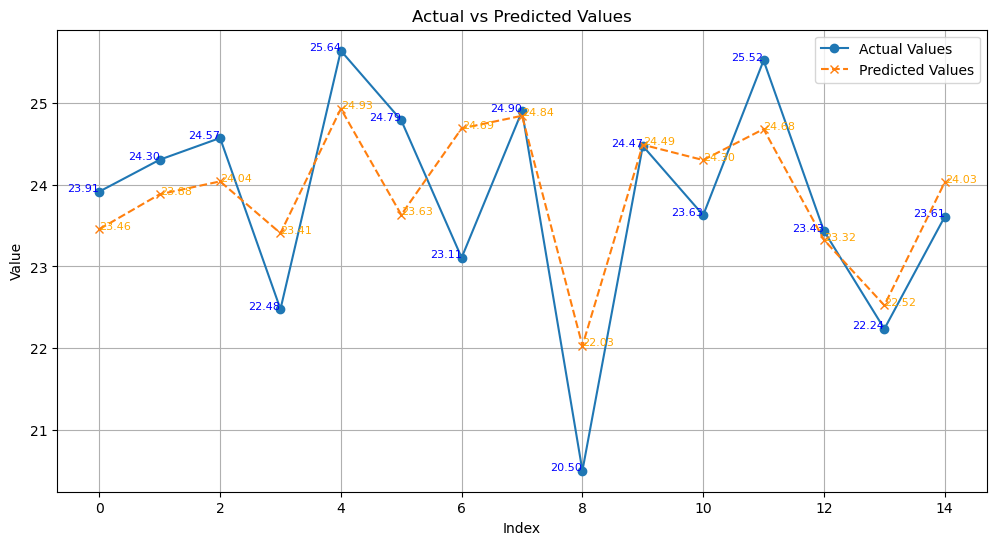

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Pastikan data berbentuk array (jika tidak, ubah dengan np.array)
y_test = np.array(y_test1)  # Nilai aktual
y_pred = np.array(y_pred_log)  # Nilai prediksi

# Buat plot
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test1)), y_test1, label='Actual Values', marker='o', linestyle='-')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values', marker='x', linestyle='--')

# Tambahkan angka di setiap titik
for i, (y_actual, y_predict) in enumerate(zip(y_test1, y_pred)):
    plt.text(i, y_actual, f'{y_actual:.2f}', fontsize=8, ha='right', color='blue')
    plt.text(i, y_predict, f'{y_predict:.2f}', fontsize=8, ha='left', color='orange')

# Tambahkan label dan judul
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()

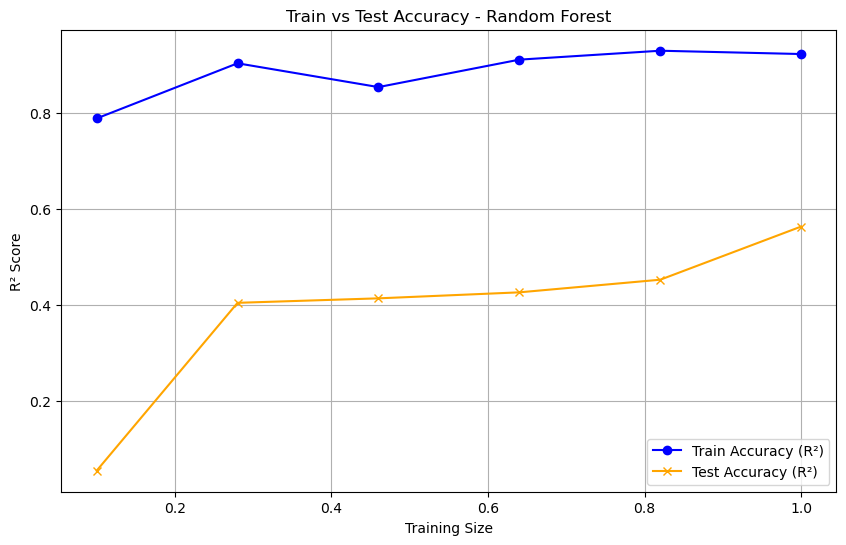

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Model terbaik dari results_df1
best_model_name = results_df1.iloc[1]['Model']
best_model = models1[best_model_name]

# Training sizes (misalnya dalam persen data training)
training_sizes = np.linspace(0.1, 1.0, 6)

# Menyimpan nilai R² untuk setiap training size
train_accuracies_best = []
test_accuracies_best = []

for size in training_sizes:
    # Tentukan jumlah data training sesuai ukuran
    train_size = int(size * len(X_train1))
    X_train_subset = X_train1[:train_size]
    y_train_subset = y_train1[:train_size]
    
    # Fit model dengan subset data
    best_model.fit(X_train_subset, y_train_subset)
    
    # Prediksi untuk data training dan testing
    y_train_pred = best_model.predict(X_train_subset)
    y_test_pred = best_model.predict(X_test1)
    
    # Hitung R² Score
    train_accuracies_best.append(r2_score(y_train_subset, y_train_pred))
    test_accuracies_best.append(r2_score(y_test1, y_test_pred))

# Plot Train vs Test Accuracy khusus model terbaik
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_accuracies_best, 'bo-', label='Train Accuracy (R²)')
plt.plot(training_sizes, test_accuracies_best, 'x-', color='orange', label='Test Accuracy (R²)')
plt.xlabel('Training Size')
plt.ylabel('R² Score')
plt.title(f'Train vs Test Accuracy - {best_model_name}')
plt.grid(True)
plt.legend()
plt.show()


In [42]:
from sklearn.model_selection import cross_val_score

# Model terbaik
best_model_name = results_df1.iloc[0]['Model']
best_model = models1[best_model_name]

# Cross-validation
cv_folds = 5  # Jumlah lipatan (folds)
cv_scores = cross_val_score(best_model, X_train1, y_train1, cv=cv_folds, scoring='r2')

# Rata-rata dan standar deviasi R² Score dari cross-validation
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

# Tampilkan hasil
print(f"Cross-Validation Scores (R²): {cv_scores}")
print(f"Mean R² Score: {mean_cv_score:.4f}")
print(f"Standard Deviation: {std_cv_score:.4f}")


Cross-Validation Scores (R²): [ 0.49864369 -1.15743481  0.68625536  0.55061394  0.27542848]
Mean R² Score: 0.1707
Standard Deviation: 0.6771


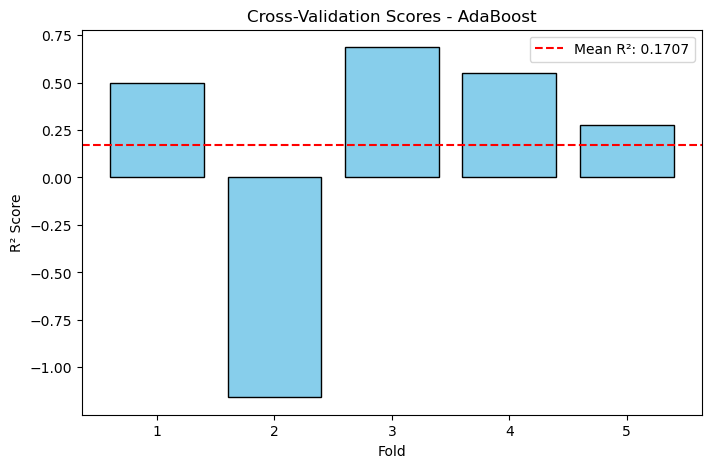

In [43]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, cv_folds + 1), cv_scores, color='skyblue', edgecolor='black')
plt.axhline(y=mean_cv_score, color='red', linestyle='--', label=f"Mean R²: {mean_cv_score:.4f}")
plt.xlabel('Fold')
plt.ylabel('R² Score')
plt.title(f'Cross-Validation Scores - {best_model_name}')
plt.legend()
plt.show()


In [44]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter yang akan dituning untuk model AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200],         # Jumlah estimators
    'learning_rate': [0.01, 0.1, 1, 10],   # Learning rate
    'loss': ['linear', 'square', 'exponential']  # Loss function
}

# Inisialisasi model terbaik (contohnya: AdaBoostRegressor)
best_model = AdaBoostRegressor()

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)

# Jalankan GridSearchCV
grid_search.fit(X_train1, y_train1)

# Hasil terbaik
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation R² Score: {best_score:.4f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 50}
Best Cross-Validation R² Score: 0.4033


In [45]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Definisikan parameter yang akan dituning (dengan distribusi probabilitas)
param_dist = {
    'n_estimators': [50, 100, 200, 300, 500],
    'learning_rate': uniform(0.01, 1.0),  # Learning rate dari 0.01 hingga 1.0
    'loss': ['linear', 'square', 'exponential']
}

# Inisialisasi model terbaik (contohnya: AdaBoostRegressor)
best_model = AdaBoostRegressor()

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=best_model, param_distributions=param_dist, n_iter=50, cv=5, scoring='r2', verbose=1, n_jobs=-1, random_state=42)

# Jalankan RandomizedSearchCV
random_search.fit(X_train1, y_train1)

# Hasil terbaik
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation R² Score: {best_score:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'learning_rate': 0.8731034258755935, 'loss': 'square', 'n_estimators': 50}
Best Cross-Validation R² Score: 0.3994


In [46]:
# Model dengan parameter terbaik
best_model_tuned = AdaBoostRegressor(**best_params)
best_model_tuned.fit(X_train1, y_train1)

# Prediksi pada data testing
y_pred_tuned = best_model_tuned.predict(X_test1)

# Evaluasi performa
r2_tuned = r2_score(y_test1, y_pred_tuned)
print(f"Testing R² Score (Tuned Model): {r2_tuned:.4f}")


Testing R² Score (Tuned Model): 0.6172


Testing R² Score (Tuned Model): 0.6114


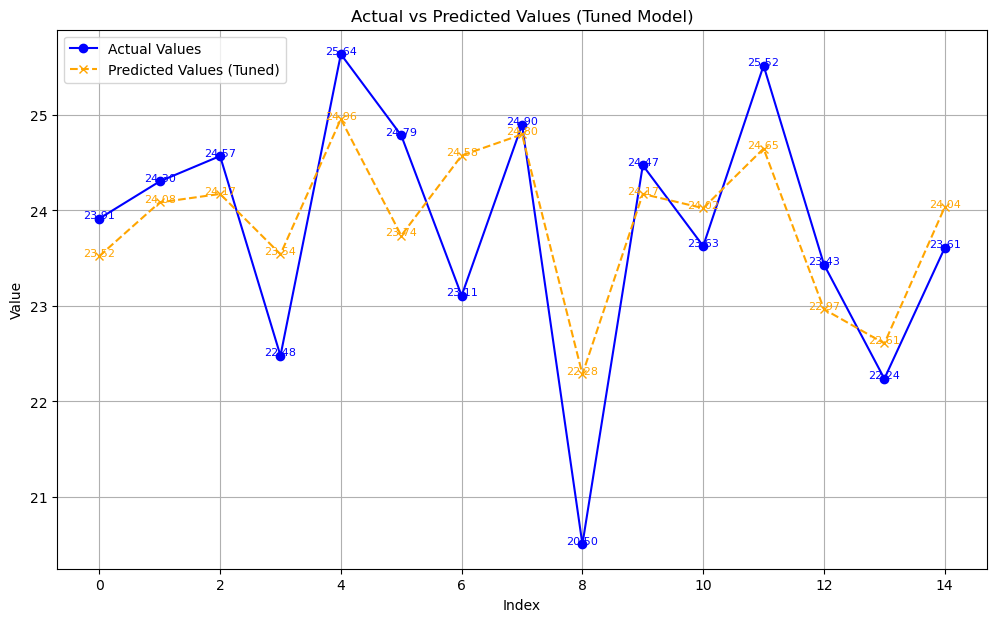

In [48]:
import matplotlib.pyplot as plt

# Model dengan parameter terbaik setelah tuning
best_model_tuned = AdaBoostRegressor(**grid_search.best_params_)
best_model_tuned.fit(X_train1, y_train1)

# Prediksi pada data testing
y_pred_tuned = best_model_tuned.predict(X_test1)

# Evaluasi performa
r2_tuned = r2_score(y_test1, y_pred_tuned)
print(f"Testing R² Score (Tuned Model): {r2_tuned:.4f}")

# Visualisasi Hasil: Actual vs Predicted
plt.figure(figsize=(12, 7))
plt.plot(range(len(y_test1)), y_test1, 'o-', label='Actual Values', color='blue')
plt.plot(range(len(y_pred_tuned)), y_pred_tuned, 'x--', label='Predicted Values (Tuned)', color='orange')
for i, (a, p) in enumerate(zip(y_test1, y_pred_tuned)):
    plt.text(i, a, f"{a:.2f}", color="blue", fontsize=8, ha='center')
    plt.text(i, p, f"{p:.2f}", color="orange", fontsize=8, ha='center')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values (Tuned Model)')
plt.legend()
plt.grid(True)
plt.show()



In [49]:
print("Best Parameters after Tuning:", grid_search.best_params_)


Best Parameters after Tuning: {'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 50}


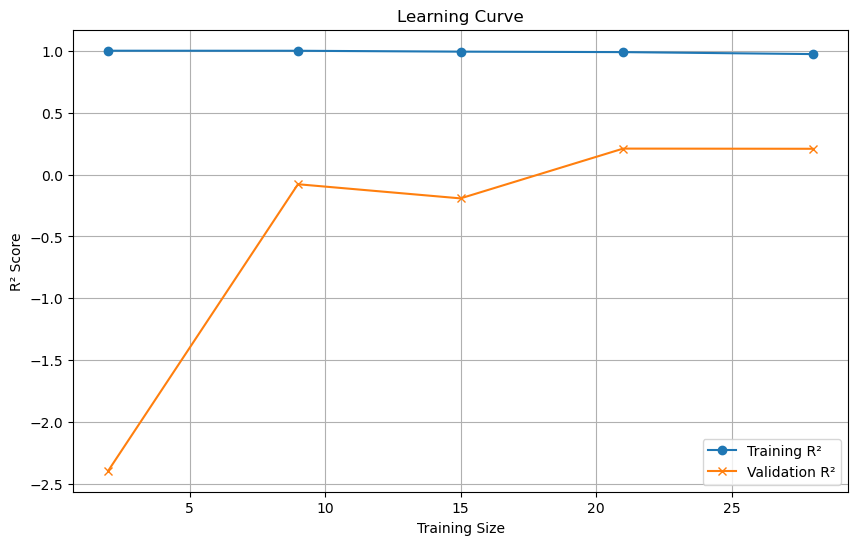

In [50]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model_tuned, X_train1, y_train1, cv=5, scoring='r2', n_jobs=-1
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training R²")
plt.plot(train_sizes, test_scores_mean, 'x-', label="Validation R²")
plt.xlabel("Training Size")
plt.ylabel("R² Score")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()
